In [2]:
#import dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from pathlib import Path

In [3]:
#import files fron resources
csv_path = Path("Resources/longitude-latitude.csv")
csv_path1= Path("Resources/Forbes_Billionaires.csv")

In [4]:
#read both csv files
coordinates_df=pd.read_csv(csv_path, encoding="utf-8")
billis_df= pd.read_csv(csv_path1)

In [5]:
#view coordinates_df info
coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               321 non-null    object 
 1   ISO-ALPHA-3           313 non-null    object 
 2   ISO-ALPHA-2           291 non-null    object 
 3   IOC                   263 non-null    object 
 4   FIFA                  265 non-null    object 
 5   Latitude              320 non-null    float64
 6   Longitude             320 non-null    float64
 7   ISO-Name              321 non-null    int64  
 8   Historical            321 non-null    int64  
 9   WikiData_ID           321 non-null    object 
 10  WikiData_Latitude     321 non-null    float64
 11  WikiData_Longitude    321 non-null    float64
 12  WikiData_Label        321 non-null    object 
 13  WikiData_Description  321 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 35.2+ KB


In [6]:
#check for null values in df
coordinates_df.isnull().sum()

Country                  0
ISO-ALPHA-3              8
ISO-ALPHA-2             30
IOC                     58
FIFA                    56
Latitude                 1
Longitude                1
ISO-Name                 0
Historical               0
WikiData_ID              0
WikiData_Latitude        0
WikiData_Longitude       0
WikiData_Label           0
WikiData_Description     0
dtype: int64

In [7]:
#view Billionaiare csv
billis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


In [8]:
#Merge files to add Latitude and Longitude
Merged_df = pd.merge(billis_df, coordinates_df[['Country','Latitude', 'Longitude']], on= 'Country', how='left')

In [9]:
#merged file with Lat and Long
Merged_df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,Latitude,Longitude
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,37.090240,-95.712891
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,37.090240,-95.712891
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,46.227638,2.213749
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,37.090240,-95.712891
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,37.090240,-95.712891


In [10]:
Merged_df.isnull().sum()

Rank         0
Name         0
Networth     0
Age          0
Country      0
Source       0
Industry     0
Latitude     2
Longitude    2
dtype: int64

In [11]:
#Find missing values in the Merged csv
Empty_df= Merged_df[Merged_df.isnull().any(axis=1)]
print(Empty_df)

      Rank            Name  Networth  Age               Country  \
513     509  Nathan Kirsh        5.3   90  Eswatini (Swaziland)   
2063   1929   Myron Wentz        1.5   82   St. Kitts and Nevis   

                   Source           Industry  Latitude  Longitude  
513   retail, real estate  Fashion & Retail        NaN        NaN  
2063      health products  Fashion & Retail        NaN        NaN  


In [12]:
# Append coordinates in countries with missing values
Merged_df.loc[513, ['Latitude', 'Longitude']] = [-26.5225, 31.4659]  # Coordinates for Eswatini
Merged_df.loc[2063, ['Latitude', 'Longitude']] = [17.3578, -62.7830]  # Coordinates for St. Kitts and Nevis

In [13]:
# Export to .csv file for manual inspection
Merged_df.to_csv('Merged_df.csv', index=False)

In [14]:
import json 

In [15]:
chunk_size = 100000

with open ('Merged_df.json', 'w') as json_file:
    for chunk in pd.read_csv('Merged_df.csv', chunksize=chunk_size):
        chunk_json = chunk.to_json(orient='records', lines=True)

    json_file.write(chunk_json + '\n')

C:\Users\alabi\AppData\Local\Temp\ipykernel_11864\218597452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= Merged_df, x = "Networth", y = "Industry", order = Merged_df['Industry'].value_counts().index, estimator = sum , errwidth = 0,palette=sns.color_palette("cubehelix", as_cmap=False))
C:\Users\alabi\AppData\Local\Temp\ipykernel_11864\218597452.py:2: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= Merged_df, x = "Networth", y = "Industry", order = Merged_df['Industry'].value_counts().index, estimator = sum , errwidth = 0,palette=sns.color_palette("cubehelix", as_cmap=False))
C:\Users\alabi\AppData\Local\Temp\ipykernel_11864\218597452.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. 

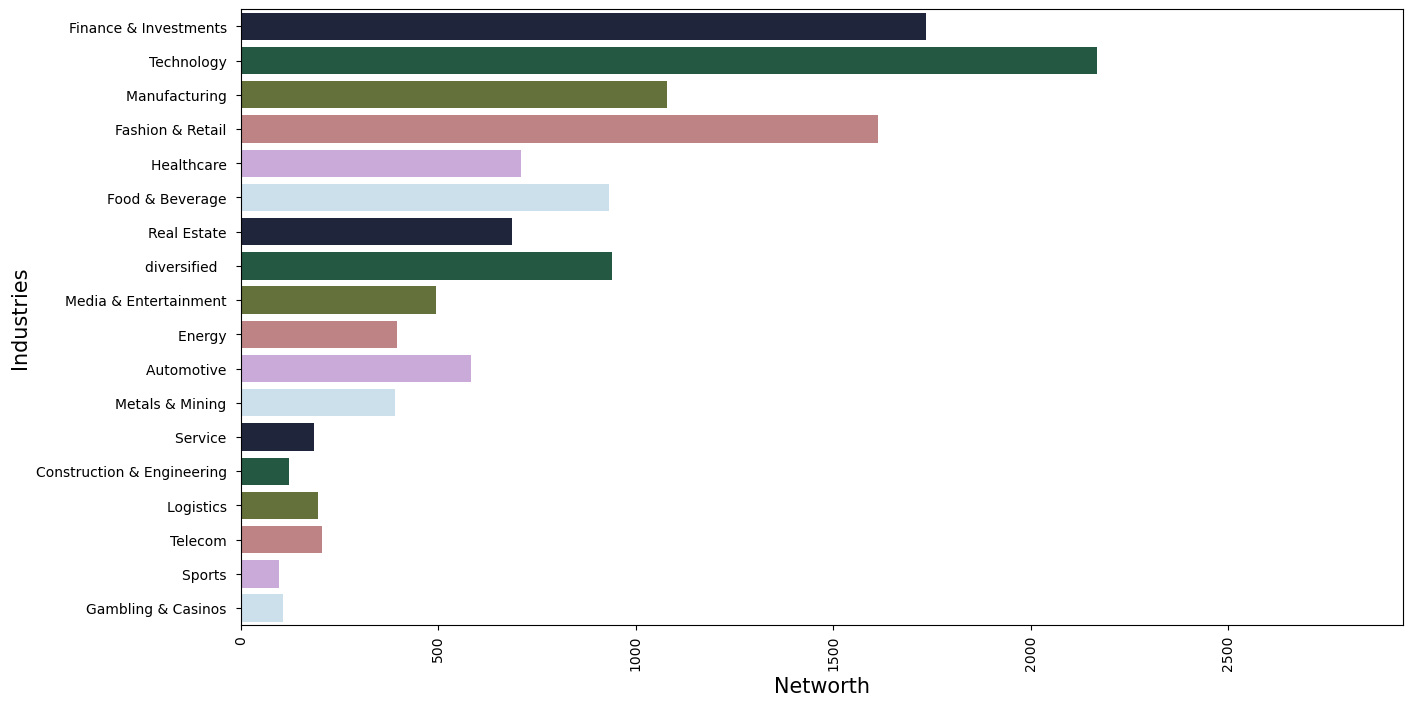

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data= Merged_df, x = "Networth", y = "Industry", order = Merged_df['Industry'].value_counts().index, estimator = sum , errwidth = 0,palette=sns.color_palette("cubehelix", as_cmap=False))
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

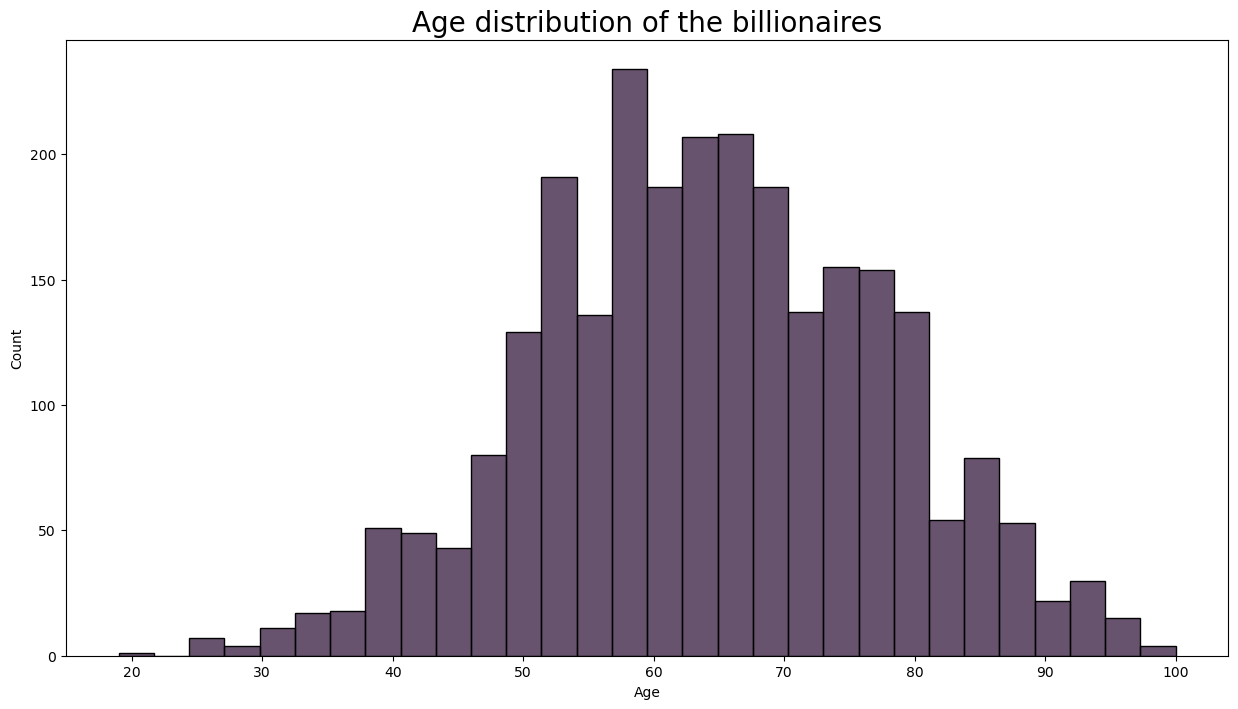

In [39]:
plt.figure(figsize = (15,8))
color = sns.color_palette("rocket_r", as_cmap=False)[5]
sns.histplot(data = Merged_df, x = 'Age', color = color)
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

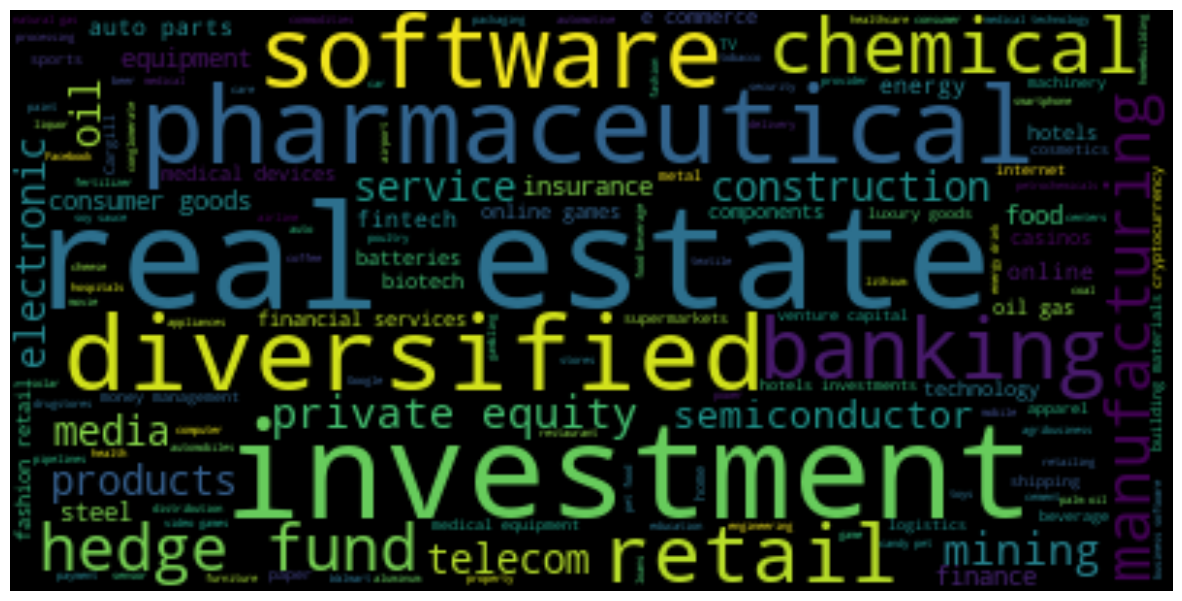

In [19]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in Merged_df.Source) 

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50, 
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();